In [128]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [129]:
file = open('WISDM_ar_v1.1_raw.txt')
lines = file.readlines()
processedList=[]
for i , line in enumerate (lines):
    try:
        line = line.split(',')
        last= line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp= [line[0],line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number:', i)
        

Error at line number: 281873
Error at line number: 281874
Error at line number: 281875


In [130]:
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.DataFrame(data = processedList,columns = columns)
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [131]:
df.shape

(343416, 6)

In [132]:
df.isnull().sum()

user         0
activity     0
timestamp    0
x-axis       0
y-axis       0
z-axis       0
dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user       343416 non-null  object
 1   activity   343416 non-null  object
 2   timestamp  343416 non-null  object
 3   x-axis     343416 non-null  object
 4   y-axis     343416 non-null  object
 5   z-axis     343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


# Data Exploration
Let's start from counting the number of records for each type of activity

In [134]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

Let's plot it

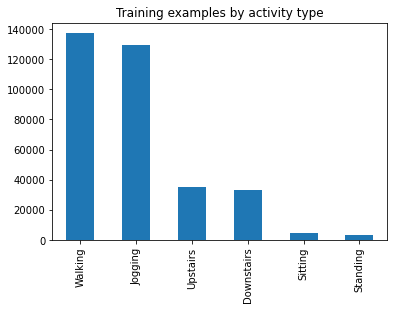

In [135]:
df['activity'].value_counts().plot(kind='bar', title='Training examples by activity type')

 * <b>We can see that there are Highest number of records in walking and standing, sitting are having very less number of records.
 * It is highly imbalanced data


# Balancing the data

In [136]:
# Convert data to float values
df['x-axis']=df['x-axis'].astype('float')
df['y-axis']=df['y-axis'].astype('float')
df['z-axis']=df['z-axis'].astype('float')

# Now let's finds that how many records belong to each volunteer

In [137]:
count_activity_per_person=df['user'].value_counts()
print(count_activity_per_person)

20    35599
27    34958
29    34323
13    34255
36    32261
32    30778
18    29390
15    28154
6     27316
33    24593
35    19726
11     6199
17     5864
Name: user, dtype: int64


In [138]:
total_activity=count_activity_per_person.sum()
print("Total number of activity recorded = "+ str(total_activity))

Total number of activity recorded = 343416


Let's visualize how many activity is done by every user

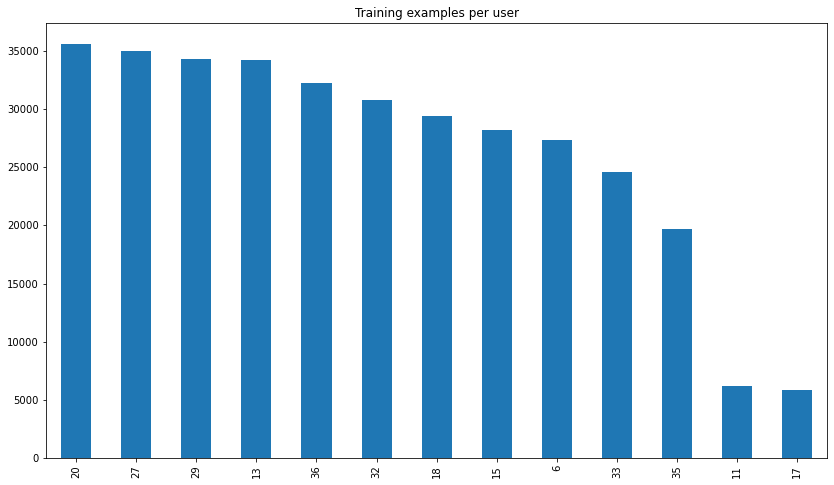

In [139]:
count_activity_per_person.plot(kind='bar', title='Training examples per user', figsize=(14,8))

* Volunteer no. 20 has done maximum number of records
* Volunteer no. 17 has done minimum number of records

# Let's visualize the accelerometer data 

In [140]:
def plot_activity(activity, df):
    extract_rows_of_activity=df[df['activity'] == activity]
    data = extract_rows_of_activity
    data = data[['x-axis', 'y-axis','z-axis']]
    data = data[:200]
    ax = data.plot(subplots= True, figsize=(16, 12), 
                     title=activity)

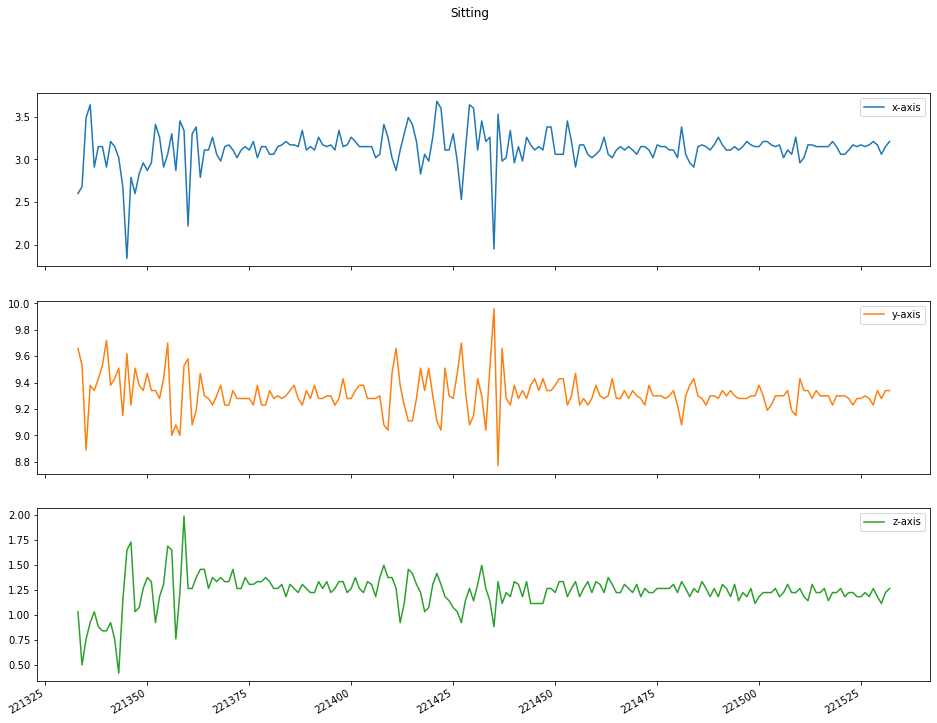

In [141]:
plot_activity('Sitting', df)

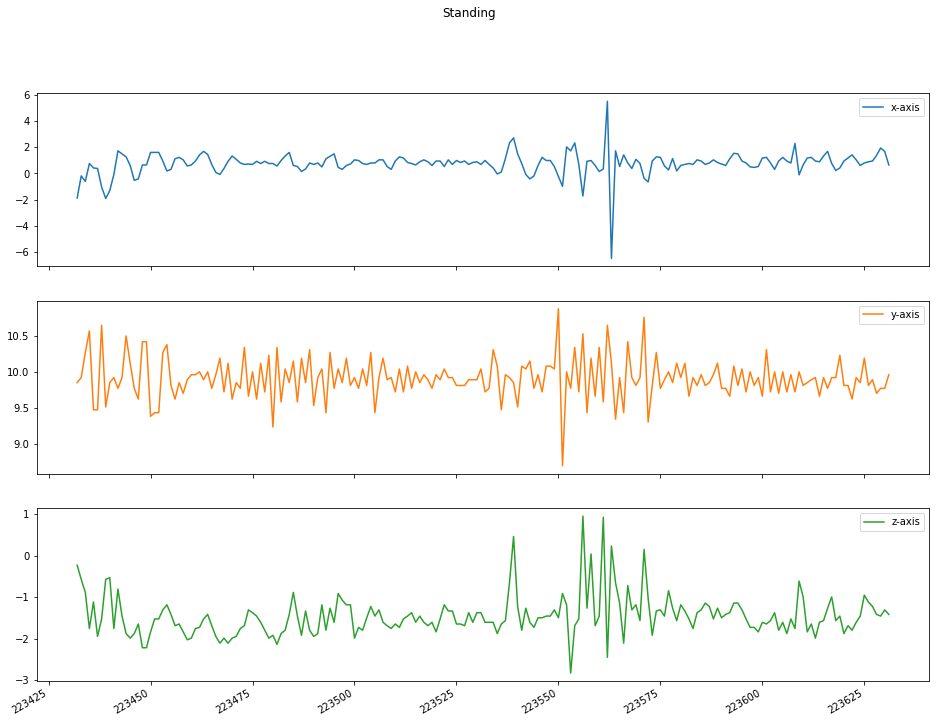

In [142]:
plot_activity("Standing", df)

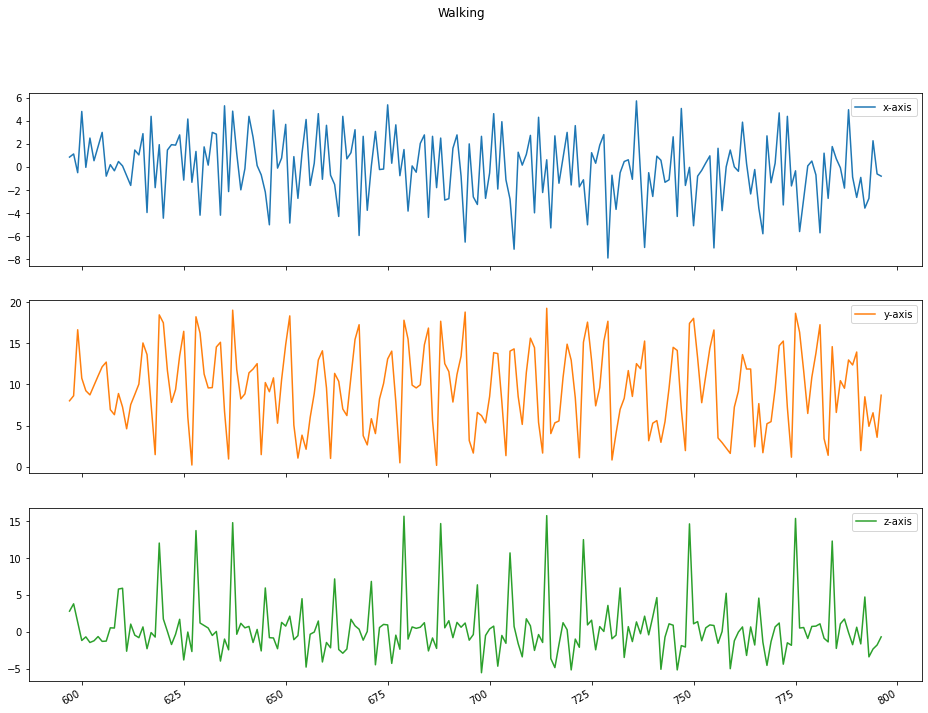

In [143]:
plot_activity("Walking", df)

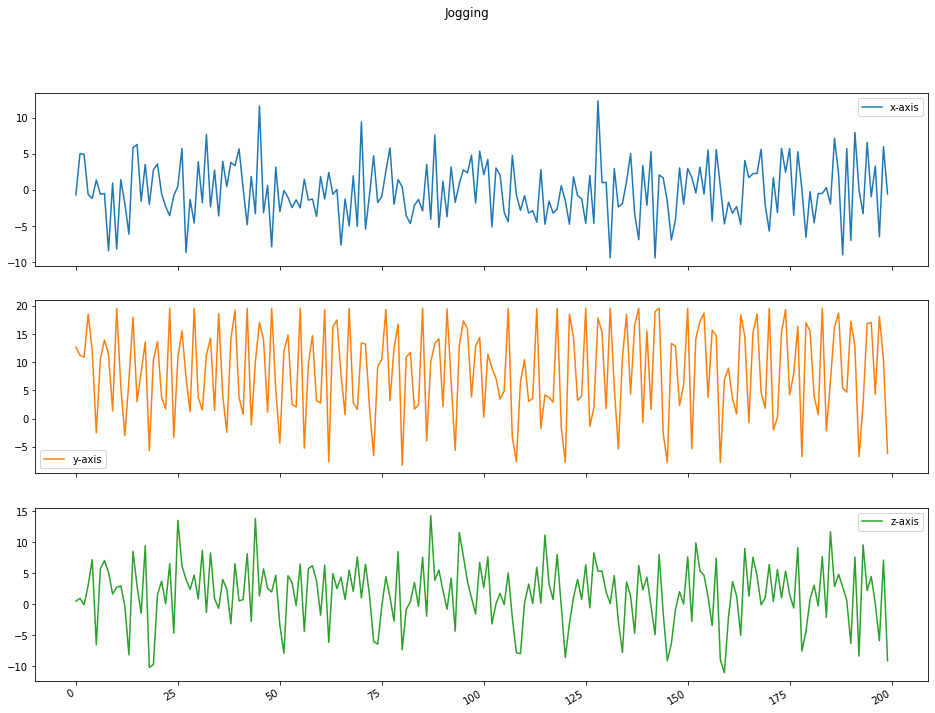

In [144]:
plot_activity("Jogging", df)

## Let's remove user and time stamp

In [145]:
df_new=df.drop(['user','timestamp'],axis=1).copy()

In [146]:
pd.DataFrame(df_new)

,activity,x-axis,y-axis,z-axis
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...
343411,Walking,0.310000,10.730000,0.040861
343412,Walking,2.760000,10.950000,0.844462
343413,Walking,0.800000,10.150000,1.334794
343414,Walking,-1.570000,8.690000,1.416516


## As it is highly imbalanced data, we will take only minimum count of 3555 i.e., standing from all other activity also.

<b>So we will make new data frame for different activity and append them.

In [147]:
Walking=df_new[df_new['activity']=='Walking'].head(3555).copy()
Jogging=df_new[df_new['activity']=='Jogging'].head(3555).copy()
Standing=df_new[df_new['activity']=='Standing'].head(3555).copy()
Sitting=df_new[df_new['activity']=='Sitting'].head(3555).copy()
Upstairs=df_new[df_new['activity']=='Upstairs'].head(3555).copy()
Downstairs=df_new[df_new['activity']=='Downstairs'].head(3555).copy()

In [148]:
balanced_data=pd.DataFrame()
balanced_data=balanced_data.append([Walking,Jogging,Standing,Sitting,Upstairs,Downstairs])
balanced_data.shape

(21330, 4)

In [149]:
balanced_data['activity'].value_counts()

Jogging       3555
Walking       3555
Downstairs    3555
Standing      3555
Upstairs      3555
Sitting       3555
Name: activity, dtype: int64

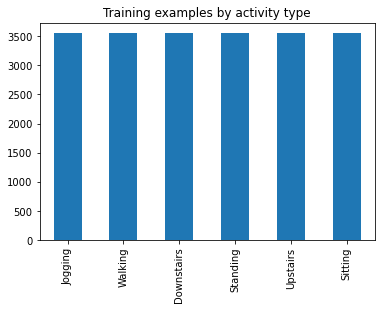

In [150]:
balanced_data['activity'].value_counts().plot(kind='bar', title='Training examples by activity type')

## Now we can see it is a balanced data set 

In [151]:
#Now convert the activity from categorial data to label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
balanced_data['label']=label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x-axis,y-axis,z-axis,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [152]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

# Standardize Data

In [153]:
x=balanced_data[['x-axis','y-axis','z-axis']]
y=balanced_data['label']

In [154]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(x)


scaled_x=pd.DataFrame(data=X,columns=['x','y','z'])
scaled_x['label']=y.values
scaled_x

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,0.482245,-0.354522,0.236730,0
21326,-0.368263,0.152722,-0.034494,0
21327,0.063698,0.234661,0.224586,0
21328,0.624443,0.168329,0.771083,0


# Data pre processing

## * Modelling time series

## * Divide the data into multiple time slices 



In [155]:
import scipy.stats as stats

In [156]:
Fs= 20 ### given in the description of data i.e, frequency
frame_size=Fs*4  ## frame size for which we will be predicting the activity i.e, for 4 sec 
## so we will be feeding data of 80 sample in 3 dimension
hop_size=Fs*2   ## i.e. if we have taken 4sec data in 1st iteration so for next we want to again take 4 sec or we want over lapping

## so here we do advancement by taking 40 data samplesafter taking 80 data samples in ist iteration

In [157]:
## Creating a function to divide the data set in the step of 4 sec

def get_frames(df,frame_size,hop_size):
    N_FEATURES = 3
    frames=[]
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        xs = df['x'].values[i: i + frame_size]
        ys = df['y'].values[i: i + frame_size]
        zs = df['z'].values[i: i + frame_size]
        
        ## Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([xs, ys, zs])
        labels.append(label)
    ## Bring the segment into better shape
    frames=np.asarray(frames).reshape(-1,frame_size,N_FEATURES)
    labels=np.asarray(labels)
    
    
    return frames ,labels

In [158]:
X,y = get_frames(scaled_x,frame_size,hop_size)

In [159]:
X.shape , y.shape

((532, 80, 3), (532,))

# Split the data

In [160]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [161]:
X_train.shape,X_test.shape

((425, 80, 3), (107, 80, 3))

<b> But if you check the data at zeroth index it will be 2 dimension

In [162]:
X_train[0].shape,X_test[0].shape

((80, 3), (80, 3))

<b> So let's make it 3-d data as CNN model taked data in 3-d

In [163]:
X_train=X_train.reshape(425,80,3,1)
X_test=X_test.reshape(107,80,3,1)

In [164]:
X_train[0].shape,X_test[0].shape

((80, 3, 1), (80, 3, 1))

# 2D CNN MODEL

In [165]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (2,2), activation='relu',input_shape=X_train[0].shape),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 79, 2, 16)         80        
_________________________________________________________________
dropout_8 (Dropout)          (None, 79, 2, 16)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 78, 1, 32)         2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 78, 1, 32)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2496)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                159808    
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)               

In [166]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [167]:
ep=50
history = model.fit(X_train,y_train,epochs=ep, validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
14/14 [==============================] - 0s 12ms/step - loss: 1.6045 - accuracy: 0.2824 - val_loss: 1.3014 - val_accuracy: 0.4766
Epoch 2/50
14/14 [==============================] - 0s 8ms/step - loss: 1.2351 - accuracy: 0.5224 - val_loss: 0.9941 - val_accuracy: 0.7477
Epoch 3/50
14/14 [==============================] - 0s 7ms/step - loss: 0.9262 - accuracy: 0.7106 - val_loss: 0.6380 - val_accuracy: 0.8411
Epoch 4/50
14/14 [==============================] - 0s 7ms/step - loss: 0.6743 - accuracy: 0.7906 - val_loss: 0.4411 - val_accuracy: 0.8879
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.5080 - accuracy: 0.8212 - val_loss: 0.3464 - val_accuracy: 0.8598
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 0.3942 - accuracy: 0.8753 - val_loss: 0.3101 - val_accuracy: 0.8785
Epoch 7/50
14/14 [==============================] - 0s 7ms/step - loss: 0.3316 - accuracy: 0.8941 - val_loss: 0.2808 - val_accuracy: 0.8785
Epoch 8/50
14/14 [=

In [168]:
def plot_learningCurve(history,epochs):
    ## Plot training and validation accuracy value
    epoch_range= range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'val'],loc='upper_left')
    plt.show()
    
    ## Plot training and validation loss value
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel("Epochs")
    plt.ylabel('loss')
    plt.legend(['Train', 'val'],loc='upper_left')
    plt.show()
    

C:\Users\Ankit\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


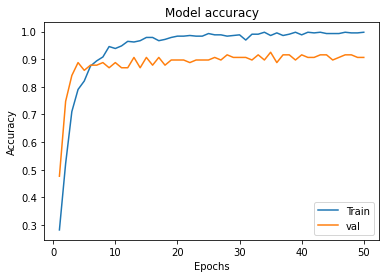

C:\Users\Ankit\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


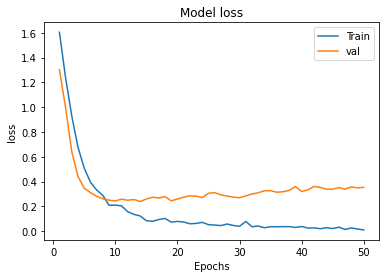

In [169]:
plot_learningCurve(history,ep)

## Confusion matrix

In [170]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [171]:
y_pred = model.predict_classes(X_test)


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1eec26c3508>)

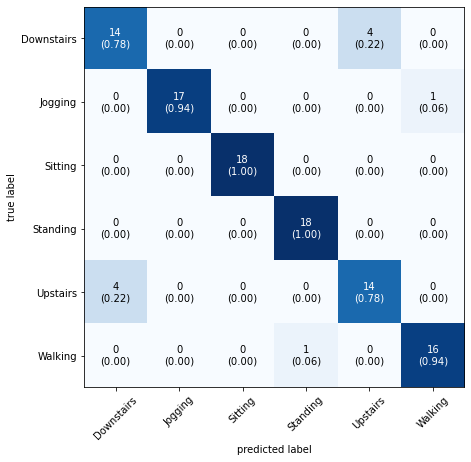

In [172]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat,class_names=label.classes_ , show_normed=True, figsize=(7,7))

# Application of LSTM model

## One hot encoding of labels

In [173]:
labels=np.asarray(pd.get_dummies(y), dtype = np.float32)

In [174]:
print(labels)
print(labels.shape)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
(532, 6)


## Splitting data

In [175]:
X_train, X_test, y_train, y_test = train_test_split(
        X, labels, test_size=0.2 ,random_state=0,stratify=y)

In [176]:
X_train.shape, y_train.shape

((425, 80, 3), (425, 6))

In [177]:
X_test.shape, y_test.shape

((107, 80, 3), (107, 6))

# Creating LSTM model

In [178]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [179]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(80,3)))
model.add(Dropout(0.5))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(6))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

## Fitting the model

In [180]:
history_LSTM=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 196ms/step - loss: 0.1478 - accuracy: 0.2141 - val_loss: 0.1319 - val_accuracy: 0.2523
Epoch 2/100
7/7 [==============================] - 1s 94ms/step - loss: 0.1278 - accuracy: 0.2612 - val_loss: 0.1165 - val_accuracy: 0.4766
Epoch 3/100
7/7 [==============================] - 1s 94ms/step - loss: 0.1129 - accuracy: 0.4729 - val_loss: 0.1049 - val_accuracy: 0.5327
Epoch 4/100
7/7 [==============================] - 1s 83ms/step - loss: 0.1023 - accuracy: 0.5106 - val_loss: 0.0984 - val_accuracy: 0.6449
Epoch 5/100
7/7 [==============================] - 1s 89ms/step - loss: 0.0971 - accuracy: 0.5529 - val_loss: 0.0932 - val_accuracy: 0.6075
Epoch 6/100
7/7 [==============================] - 1s 83ms/step - loss: 0.0889 - accuracy: 0.6306 - val_loss: 0.0835 - val_accuracy: 0.7850
Epoch 7/100
7/7 [==============================] - 1s 83ms/step - loss: 0.0785 - accuracy: 0.7459 - val_loss: 0.0720 - val_accuracy: 0.7944
Epoch 8/100
7/7 [==

## Plotting

C:\Users\Ankit\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


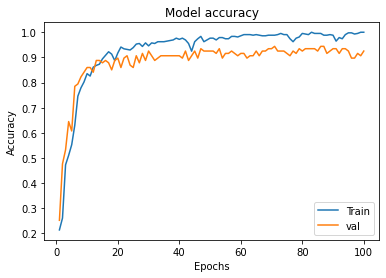

C:\Users\Ankit\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


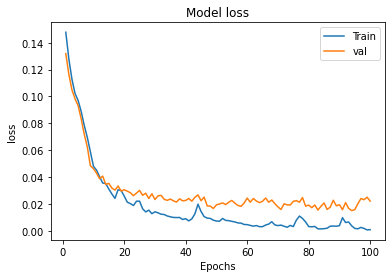

In [181]:
plot_learningCurve(history_LSTM,100)

## Confusion matrix

<b> First convert one hot encoding to label encoding

In [182]:
y_pred = model.predict_classes(X_test)

In [183]:
print(y_pred)

[4 2 2 1 1 1 5 0 2 4 2 2 0 2 3 2 1 1 2 5 4 5 5 1 1 0 5 3 3 1 5 0 4 5 2 5 2
 1 1 2 2 5 4 0 0 4 2 3 3 3 2 4 5 0 4 3 3 4 3 0 0 1 1 0 1 2 1 4 3 3 3 5 4 4
 0 4 5 2 5 5 4 3 3 4 4 3 0 3 5 5 5 0 2 1 4 0 3 0 0 1 2 5 0 5 1 0 2]


In [184]:
print(y_test)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1.

In [185]:
#y_label_test=np.array(y_test)
y_label_test=np.where(y_test==1)[1]
#y_label_test=pd.DataFrame(y_label)
print(y_label_test)

[4 2 2 1 1 1 5 4 2 4 3 2 0 2 3 2 1 1 2 5 4 5 5 1 1 0 5 3 3 1 0 0 4 5 2 5 2
 1 1 2 2 1 4 0 4 0 2 3 3 3 2 4 5 0 4 3 3 4 3 0 0 1 1 0 1 2 1 0 3 3 3 5 4 4
 4 4 5 2 5 5 4 3 3 4 4 3 0 3 5 5 5 0 2 1 4 0 3 0 0 1 2 5 0 5 1 0 2]


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ee9fe87dc8>)

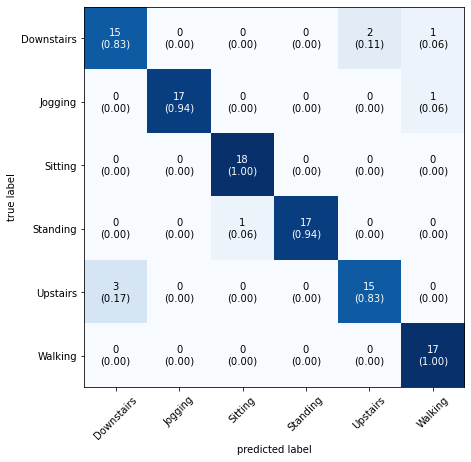

In [186]:
mat = confusion_matrix(y_label_test, y_pred)
plot_confusion_matrix(conf_mat=mat,class_names=label.classes_ , show_normed=True, figsize=(7,7))